# 1. Introduction

Maverick is a retail convenience store in the western United States and recently even bought Kum & Go.They want to be people's first stop when they are on an adventure. Their business goal is to continue growing by building around 30 new stoes each year. Therefore, their business problem is that they need to be able to accurately provide daily forecasts for a new store's first year total sales. This would allow Maverick to put together their financial plan more effectively and may help them create more accurate initial ROI documents. 

Questions:
Which weekday provides the most total sales? Is there more total sales during the weekend?
What time of the year provides the most total sales? Is there more during the summer?
Do most stores sell diseal gas?
Does a stores local population or population's income effect total sales?
Of the sites in the dataset which ones provide the most total sales? What charecteristics do they have?

## 1.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import chardet
import seaborn as sns
import matplotlib.patches as mp
import matplotlib.pyplot as plt

## 1.2 Import Data

In [3]:
#reading in the qualitative dataset
df_qdm = pd.read_csv("qualitative_data_msba.csv")

#reading in the time series dataset
df_tsdm = pd.read_csv("time_series_data_msba.csv")

# 2. First Observations

## 2.1 Observing the first 5 rows

In [6]:
#Qualitative Data
df_qdm.head()

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,1,2021,5046,2,2,38,Yes,Yes,Yes,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
1,2,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
2,3,2021,5046,2,2,35,Yes,Yes,Yes,Yes,...,5,In-Line,None,No,Yes,3,2,4,1,22015
3,4,2021,5046,2,2,36,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
4,5,2021,5046,2,2,25,Yes,Yes,Yes,No,...,0,NaN,NaN,No,Yes,0,0,0,0,22120


In [8]:
#Time Series data
df_tsdm.head()

,Unnamed: 0,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,1,2022-06-14,2022-06-17,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,2,2022-06-14,2022-06-22,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,3,2022-06-14,2022-06-23,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,4,2022-06-14,2022-06-26,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,5,2022-06-14,2022-06-27,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535


## 2.2 Basic Observations of the Qualitative Data

In [9]:
# There are 37 rows and 55 columns
print(df_qdm.shape)

(37, 55)


In [11]:
# Information about the data types of the columns
df_qdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               37 non-null     int64 
 1   open_year                                37 non-null     int64 
 2   square_feet                              37 non-null     int64 
 3   front_door_count                         37 non-null     int64 
 4   years_since_last_project                 37 non-null     int64 
 5   parking_spaces                           37 non-null     int64 
 6   lottery                                  37 non-null     object
 7   freal                                    37 non-null     object
 8   bonfire_grill                            37 non-null     object
 9   pizza                                    37 non-null     object
 10  cinnabon                                 37 non-null     object


In [44]:
# Descriptive statistics of the numeric columns
df_qdm.describe()

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,...,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
count,37.000000,37.000000,37.00000,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.000000,2021.324324,4970.27027,2.0,1.648649,37.405405,6703.567568,4757.648649,53300.378378,1833.108108,...,14.270270,2.513514,3.324324,3.324324,2.513514,2.378378,2.351351,4.648649,1.702703,23040.405405
std,10.824355,0.474579,575.93121,0.0,0.483978,5.918237,5694.011350,4697.168291,24333.027254,1915.140476,...,3.948619,2.049683,2.925501,2.925501,2.049683,0.923500,0.856875,1.751447,0.740303,730.069801
min,1.000000,2021.000000,2933.00000,2.0,1.000000,23.000000,0.000000,56.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21560.000000
25%,10.000000,2021.000000,5046.00000,2.0,1.000000,34.000000,1984.000000,1771.000000,39538.000000,262.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,22540.000000
50%,19.000000,2021.000000,5046.00000,2.0,2.000000,38.000000,5574.000000,3895.000000,46356.000000,1003.000000,...,12.000000,4.000000,5.000000,5.000000,4.000000,2.000000,2.000000,4.000000,2.000000,22890.000000
75%,28.000000,2022.000000,5046.00000,2.0,2.000000,41.000000,11269.000000,6002.000000,73519.000000,2686.000000,...,16.000000,4.000000,5.000000,5.000000,4.000000,3.000000,3.000000,6.000000,2.000000,23555.000000
max,37.000000,2022.000000,6134.00000,2.0,2.000000,49.000000,18692.000000,26077.000000,110957.000000,5923.000000,...,24.000000,6.000000,9.000000,9.000000,6.000000,5.000000,5.000000,10.000000,4.000000,24535.000000


The average square feet of the stores is 4970.27
The average amount parking spots per store is 37
The average population within 1 mile of the store is 6703.57
The average number of individuals in workplace within 1-mile radius is 4757.65
The average median income of 1-mile radius population is $53,300.38
The average population within 1/2-mile radius is 1833.11
The average number of traditional forecourt fueling positions is 14
The average number of RV fueling positions 2
The average number of high flow fueling positions is 3
The average number of men's stalls is 2
The average number of men's urinals is 2
The average number of women's stalls is 4
The average number of women's sinks is 1

## 2.3 Basic Observations of the Time Series Data

In [13]:
# There are 13908 rows and 12 columns
print(df_tsdm.shape)

(13908, 12)


In [14]:
# Information about the data types of the columns
df_tsdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          13908 non-null  int64  
 1   capital_projects.soft_opening_date  13908 non-null  object 
 2   calendar.calendar_day_date          13908 non-null  object 
 3   calendar.fiscal_week_id_for_year    13908 non-null  int64  
 4   calendar.day_of_week                13908 non-null  object 
 5   calendar_information.holiday        13908 non-null  object 
 6   calendar_information.type_of_day    13908 non-null  object 
 7   daily_yoy_ndt.total_inside_sales    13908 non-null  float64
 8   daily_yoy_ndt.total_food_service    13908 non-null  float64
 9   diesel                              13908 non-null  float64
 10  unleaded                            13908 non-null  float64
 11  site_id_msba                        13908

In [15]:
# Descriptive statistics of the numeric columns
print(df_tsdm.describe())

         Unnamed: 0  calendar.fiscal_week_id_for_year  \
count  13908.000000                      13908.000000   
mean    6954.500000                         26.501079   
std     4015.038107                         14.998715   
min        1.000000                          1.000000   
25%     3477.750000                         14.000000   
50%     6954.500000                         26.000000   
75%    10431.250000                         39.000000   
max    13908.000000                         52.000000   

       daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
count                      13908.000000                      13908.000000   
mean                        2846.537988                        759.922326   
std                          981.299870                        341.578220   
min                            0.000000                          0.000000   
25%                         2181.156250                        521.087875   
50%                     

# 3. Deeper Dive into the Qualitative Data

## 3.1 Checking the Distribution of the yes/no columns

In [23]:
# Count the occurrences of each class in the lottery column
lottery_counts = df_qdm['lottery'].value_counts()

# Calculate the percentage of each class
lottery_percentages = lottery_counts / len(df_qdm) * 100

# Print the counts and percentages
print(lottery_counts)
print(lottery_percentages)

Yes    23
No     14
Name: lottery, dtype: int64
Yes    62.162162
No     37.837838
Name: lottery, dtype: float64


23 of the 37 stores (62.2%) sell lottery tickets

In [24]:
# Count the occurrences of each class in the freal column
freal_counts = df_qdm['freal'].value_counts()

# Calculate the percentage of each class
freal_percentages = freal_counts / len(df_qdm) * 100

# Print the counts and percentages
print(freal_counts)
print(freal_percentages)

Yes    36
No      1
Name: freal, dtype: int64
Yes    97.297297
No      2.702703
Name: freal, dtype: float64


36 of the 37 stores (97.3%) sell freals

In [25]:
# Count the occurrences of each class in the bonfire_grill column
bonfire_grill_counts = df_qdm['bonfire_grill'].value_counts()

# Calculate the percentage of each class
bonfire_grill_percentages = bonfire_grill_counts / len(df_qdm) * 100

# Print the counts and percentages
print(bonfire_grill_counts)
print(bonfire_grill_percentages)

Yes    26
No     11
Name: bonfire_grill, dtype: int64
Yes    70.27027
No     29.72973
Name: bonfire_grill, dtype: float64


26 of the 37 stores (70.3%) include bonfire grills

In [26]:
# Count the occurrences of each class in the pizza column
pizza_counts = df_qdm['pizza'].value_counts()

# Calculate the percentage of each class
pizza_percentages = pizza_counts / len(df_qdm) * 100

# Print the counts and percentages
print(pizza_counts)
print(pizza_percentages)

No     22
Yes    15
Name: pizza, dtype: int64
No     59.459459
Yes    40.540541
Name: pizza, dtype: float64


22 of the 37 stores (59.5%) dont sell pizza

In [27]:
# Count the occurrences of each class in the cinnabon column
cinnabon_counts = df_qdm['cinnabon'].value_counts()

# Calculate the percentage of each class
cinnabon_percentages = cinnabon_counts / len(df_qdm) * 100

# Print the counts and percentages
print(cinnabon_counts)
print(cinnabon_percentages)

No     35
Yes     2
Name: cinnabon, dtype: int64
No     94.594595
Yes     5.405405
Name: cinnabon, dtype: float64


35 of the 37 stores (94.6%) dont sell cinnabons

In [29]:
# Count the occurrences of each class in the godfather_s_pizza column
godfather_s_pizza_counts = df_qdm['godfather_s_pizza'].value_counts()

# Calculate the percentage of each class
godfather_s_pizza_percentages = godfather_s_pizza_counts / len(df_qdm) * 100

# Print the counts and percentages
print(godfather_s_pizza_counts)
print(godfather_s_pizza_percentages)

No    37
Name: godfather_s_pizza, dtype: int64
No    100.0
Name: godfather_s_pizza, dtype: float64


37 of the 37 stores (100%) dont sell Godfather's pizza

In [31]:
# Count the occurrences of each class in the ethanol_free column
ethanol_free_counts = df_qdm['ethanol_free'].value_counts()

# Calculate the percentage of each class
ethanol_free_percentages = ethanol_free_counts / len(df_qdm) * 100

# Print the counts and percentages
print(ethanol_free_counts)
print(ethanol_free_percentages)

Yes    26
No     11
Name: ethanol_free, dtype: int64
Yes    70.27027
No     29.72973
Name: ethanol_free, dtype: float64


26 of the 37 stores (70.3%) sell ethanol free fuel

In [32]:
# Count the occurrences of each class in the diesel column
diesel_counts = df_qdm['diesel'].value_counts()

# Calculate the percentage of each class
diesel_percentages = diesel_counts / len(df_qdm) * 100

# Print the counts and percentages
print(diesel_counts)
print(diesel_percentages)

Yes    37
Name: diesel, dtype: int64
Yes    100.0
Name: diesel, dtype: float64


37 of the 37 stores (100%) sell diesel fuel 

In [33]:
# Count the occurrences of each class in the hi_flow_lanes column
hi_flow_lanes_counts = df_qdm['hi_flow_lanes'].value_counts()

# Calculate the percentage of each class
hi_flow_lanes_percentages = hi_flow_lanes_counts / len(df_qdm) * 100

# Print the counts and percentages
print(hi_flow_lanes_counts)
print(hi_flow_lanes_percentages)

Yes    22
No     15
Name: hi_flow_lanes, dtype: int64
Yes    59.459459
No     40.540541
Name: hi_flow_lanes, dtype: float64


22 of the 37 stores (59.5%) have high flow truck lanes

In [34]:
# Count the occurrences of each class in the rv_lanes column
rv_lanes_counts = df_qdm['rv_lanes'].value_counts()

# Calculate the percentage of each class
rv_lanes_percentages = rv_lanes_counts / len(df_qdm) * 100

# Print the counts and percentages
print(rv_lanes_counts)
print(rv_lanes_percentages)

Yes    23
No     14
Name: rv_lanes, dtype: int64
Yes    62.162162
No     37.837838
Name: rv_lanes, dtype: float64


23 of the 37 stores (62.2%) have rv lanes

In [35]:
# Count the occurrences of each class in the hi_flow_rv_lanes column
hi_flow_rv_lanes_counts = df_qdm['hi_flow_rv_lanes'].value_counts()

# Calculate the percentage of each class
hi_flow_rv_lanes_percentages = hi_flow_rv_lanes_counts / len(df_qdm) * 100

# Print the counts and percentages
print(hi_flow_rv_lanes_counts)
print(hi_flow_rv_lanes_percentages)

Yes    22
No     15
Name: hi_flow_rv_lanes, dtype: int64
Yes    59.459459
No     40.540541
Name: hi_flow_rv_lanes, dtype: float64


22 of the 37 stores (59.5%) have high flow rv lanes

In [36]:
# Count the occurrences of each class in the def column
def_counts = df_qdm['def'].value_counts()

# Calculate the percentage of each class
def_percentages = def_counts / len(df_qdm) * 100

# Print the counts and percentages
print(def_counts)
print(def_percentages)

Yes    23
No     14
Name: def, dtype: int64
Yes    62.162162
No     37.837838
Name: def, dtype: float64


23 of the 37 stores (62.2%) dispense Diesel exhaust fluid

In [37]:
# Count the occurrences of each class in the cat_scales column
cat_scales_counts = df_qdm['cat_scales'].value_counts()

# Calculate the percentage of each class
cat_scales_percentages = cat_scales_counts / len(df_qdm) * 100

# Print the counts and percentages
print(cat_scales_counts)
print(cat_scales_percentages)

No     32
Yes     5
Name: cat_scales, dtype: int64
No     86.486486
Yes    13.513514
Name: cat_scales, dtype: float64


32 of the 37 stores (86.5%) dont have a truck weigh

In [38]:
# Count the occurrences of each class in the car_wash column
car_wash_counts = df_qdm['car_wash'].value_counts()

# Calculate the percentage of each class
car_wash_percentages = car_wash_counts / len(df_qdm) * 100

# Print the counts and percentages
print(car_wash_counts)
print(car_wash_percentages)

No    37
Name: car_wash, dtype: int64
No    100.0
Name: car_wash, dtype: float64


None of the 37 stores have a car wash

In [39]:
# Count the occurrences of each class in the ev_charging column
ev_charging_counts = df_qdm['ev_charging'].value_counts()

# Calculate the percentage of each class
ev_charging_percentages = ev_charging_counts / len(df_qdm) * 100

# Print the counts and percentages
print(ev_charging_counts)
print(ev_charging_percentages)

No    37
Name: ev_charging, dtype: int64
No    100.0
Name: ev_charging, dtype: float64


None of the 37 stores offer electric vehicle charging

In [40]:
# Count the occurrences of each class in the rv_dumps column
rv_dumps_counts = df_qdm['rv_dumps'].value_counts()

# Calculate the percentage of each class
rv_dumps_percentages = rv_dumps_counts / len(df_qdm) * 100

# Print the counts and percentages
print(rv_dumps_counts)
print(rv_dumps_percentages)

No     24
Yes    13
Name: rv_dumps, dtype: int64
No     64.864865
Yes    35.135135
Name: rv_dumps, dtype: float64


24 of the 37 stores (64.9%) have rv dumps available

In [41]:
# Count the occurrences of each class in the propane column
propane_counts = df_qdm['propane'].value_counts()

# Calculate the percentage of each class
propane_percentages = propane_counts / len(df_qdm) * 100

# Print the counts and percentages
print(propane_counts)
print(propane_percentages)

Yes    31
No      6
Name: propane, dtype: int64
Yes    83.783784
No     16.216216
Name: propane, dtype: float64


31 of the 37 stores (83.8%) sell propane

## 3.2 Correlation Matrix of the Numerical Variables

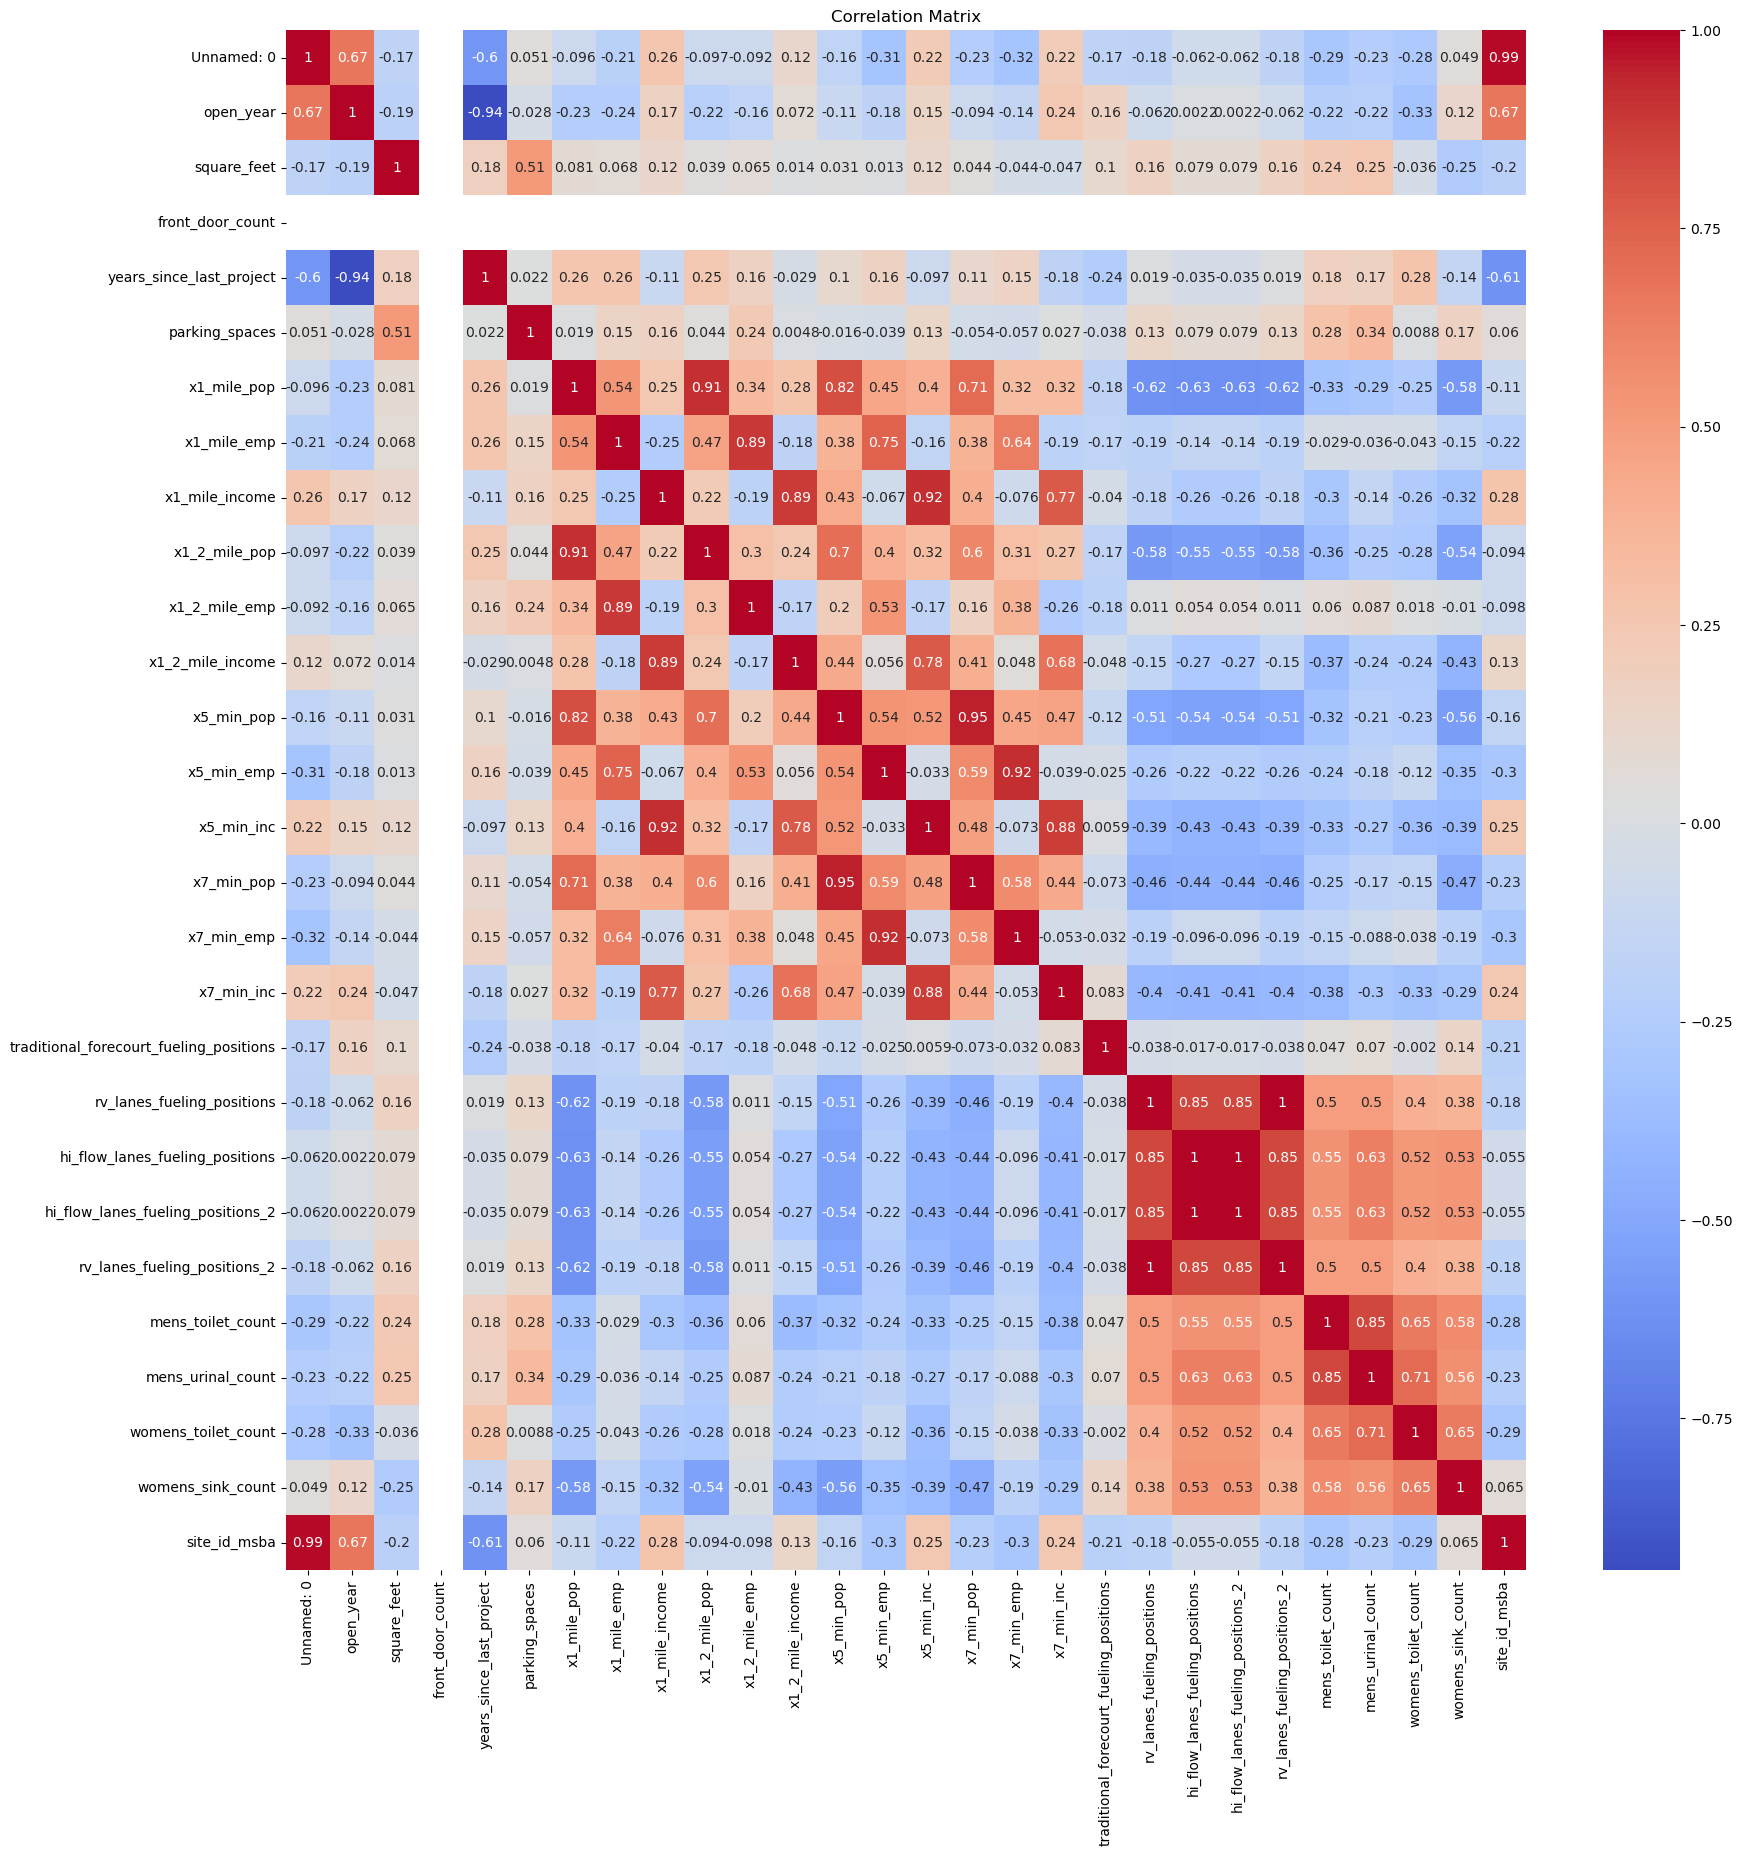

In [43]:
# Displaying a heatmap of the correlation matrix
correlation_matrix = df_qdm.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3.3 Ranking Stores based on Various Numerical Variables

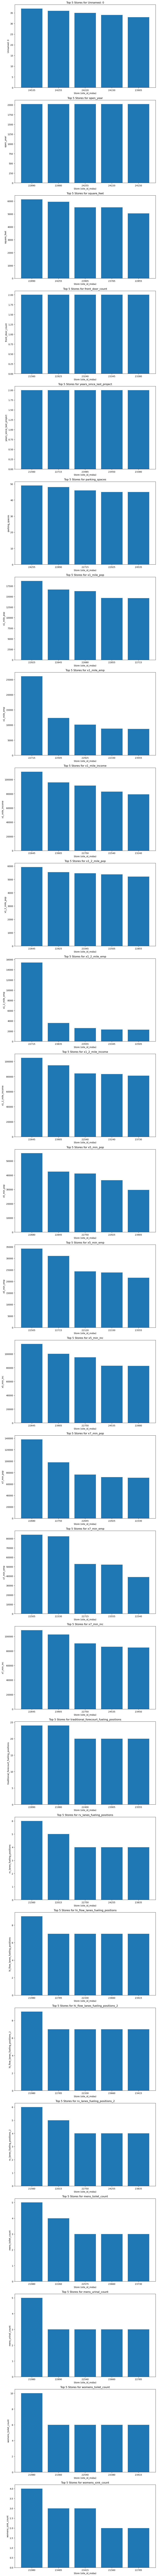

In [53]:
numerical_columns = df_qdm.select_dtypes(include='number').columns

# Convert 'site_id_msba' to string
df_qdm['site_id_msba'] = df_qdm['site_id_msba'].astype(str)

# Creating subplots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 6 * len(numerical_columns)))

# Iterate through each numerical column
for i, col in enumerate(numerical_columns):
    # Sorting in descending order
    sorted_df = df_qdm.sort_values(by=col, ascending=False)
    
    # Only showing the top 5
    top_5 = sorted_df.head(5)
    
    # Creating the bar plot
    ax = axes[i]
    ax.bar(top_5['site_id_msba'], top_5[col])
    ax.set_xlabel('Store (site_id_msba)')
    ax.set_ylabel(col)
    ax.set_title(f'Top 5 Stores for {col}')
    ax.set_xticks(top_5['site_id_msba'])
    


# Show the plots
plt.tight_layout()
plt.show()

The biggest stores are 22890, 24255, 23905, 23765, and 22855
The stores with the most parking spaces are 24255, 22890, 22715, 22925, and 24535
The stores with the biggest population within a 1 mile radius are 22925, 22645, 22680. 22855, and 22715.
The stores with the most individuals in workplace within 1-mile radius are 22715, 22505, 22925, 22330, and 23555.
The stores with the highest median income of 1-mile radius population are 22645, 23905, 22750, 22540, and 23240.
The stores with the biggest population within 1/2-mile radius are 22645, 22925, 23345, 22505, and 22855.
The stores with the most individuals in workplace within 1/2-mile radius are 22715, 23835, 23555, 23345, and 22505.
The stores with the highest median income of 1/2-mile radius population are 22645, 23905, 22540, 23240, and 23730.

In [54]:
df_qdm['site_id_msba'] = df_qdm['site_id_msba'].astype(str)

top5_count = {}

# Iterate through each numerical column
for col in numerical_columns:
    # Sorting in descending order
    sorted_df = df_qdm.sort_values(by=col, ascending=False)
    
    # Taking the top 5 stores for the current variable
    top_5 = sorted_df.head(5)
    
    # Updating the count for each store in the top 5
    for store in top_5['site_id_msba']:
        if store in top5_count:
            top5_count[store] += 1
        else:
            top5_count[store] = 1

most_common_store = max(top5_count, key=top5_count.get)

print(f"The store that appeared in the top 5 the most is store {most_common_store}.")

The store that appeared in the top 5 the most is store 23905.


## 3.4 Observing the Categorical Variables

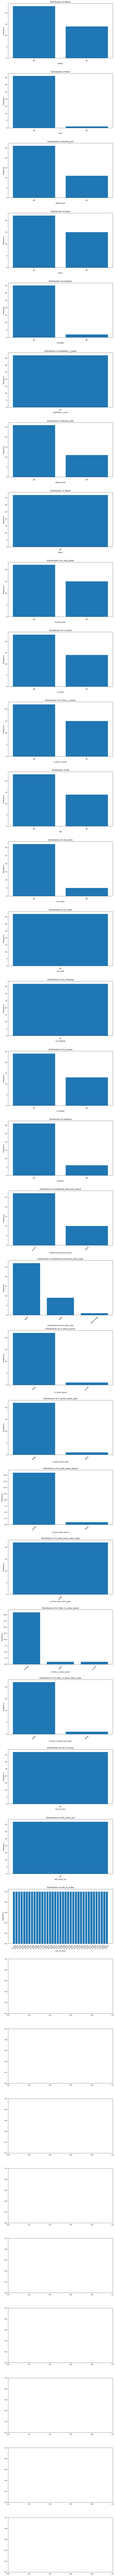

In [59]:
categorical_columns = df_qdm.select_dtypes(include=['object'])

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 6 * len(categorical_columns)))

# Iterate through each categorical column
for i, col in enumerate(categorical_columns):
    # Counting the frequency of each category in the current categorical column
    category_counts = df_qdm[col].value_counts()
    
    # Creating a bar plot for the category distribution
    ax = axes[i]
    ax.bar(category_counts.index, category_counts.values)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
    
    # Setting the tick positions and labels explicitly
    ax.set_xticks(range(len(category_counts.index)))
    ax.set_xticklabels(category_counts.index, rotation=45)
    
# Show the plots
plt.tight_layout()
plt.show()

In the traditional_forecourt_layout column most stores are In-Line
In the traditional_forecourt_stack_type column most stores have none
In the rv_lanes_layout column most stores have stack and the stack type is mostly HF/RV
In the hi_flow_lanes_layout column most stores have combo and the type is all HF/RV
In the hi_flow_rv_lanes_layout column most stores have combo and the type is mostly HF/RV

# 4. Deeper Dive into the Time Series Data

## 4.1 Observing each Numerical Column per Day of Week

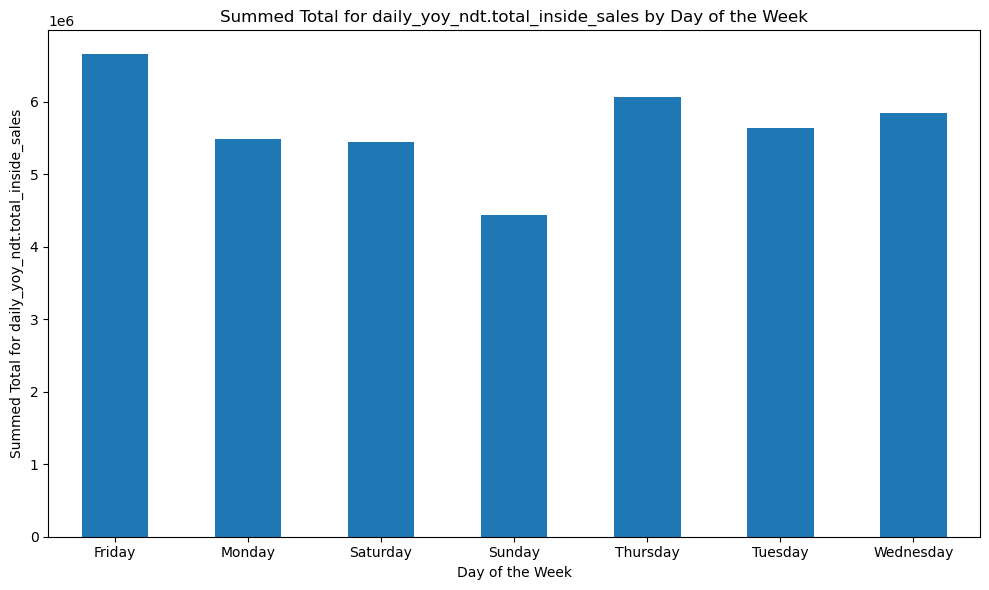

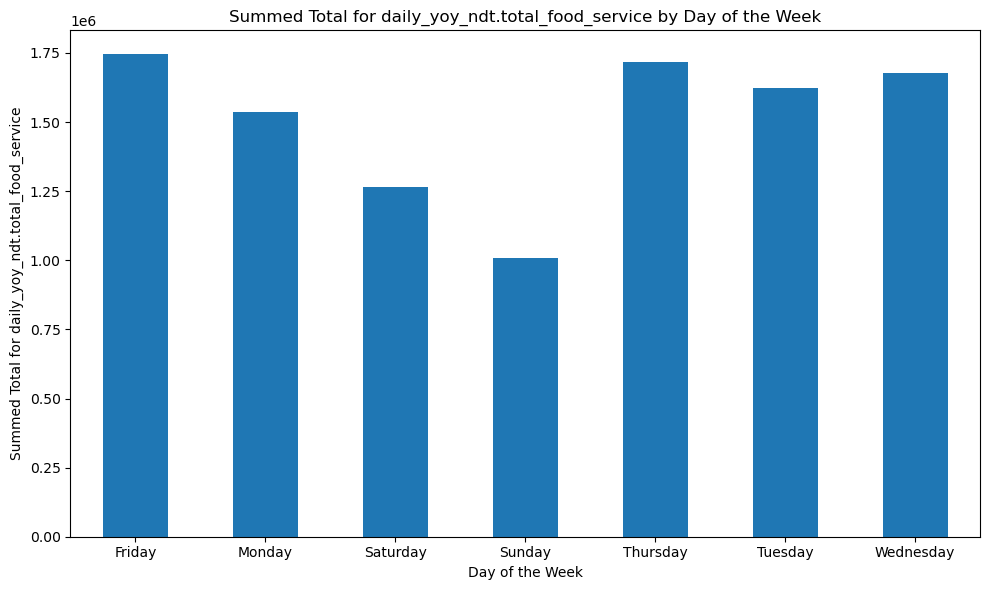

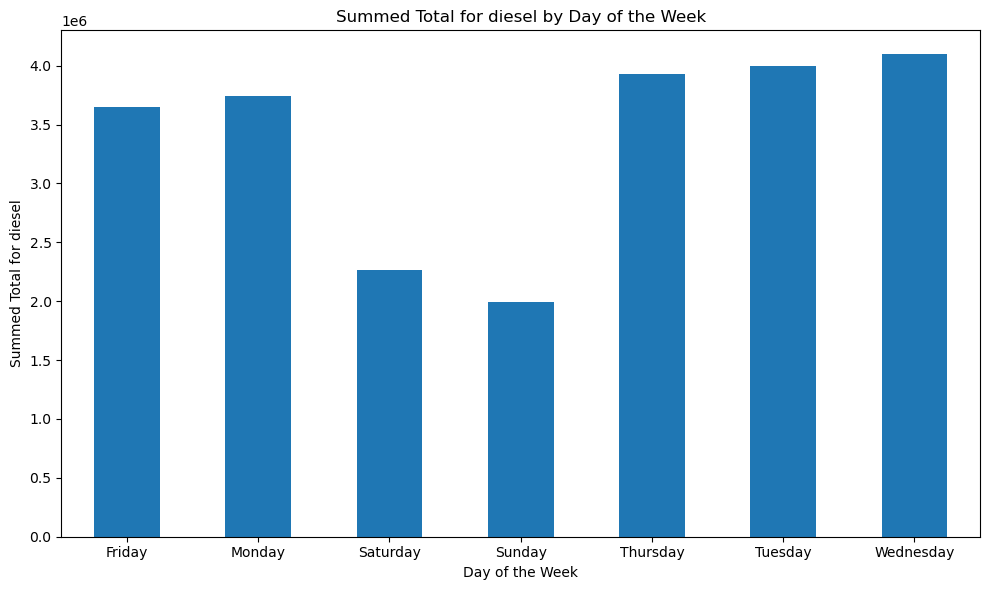

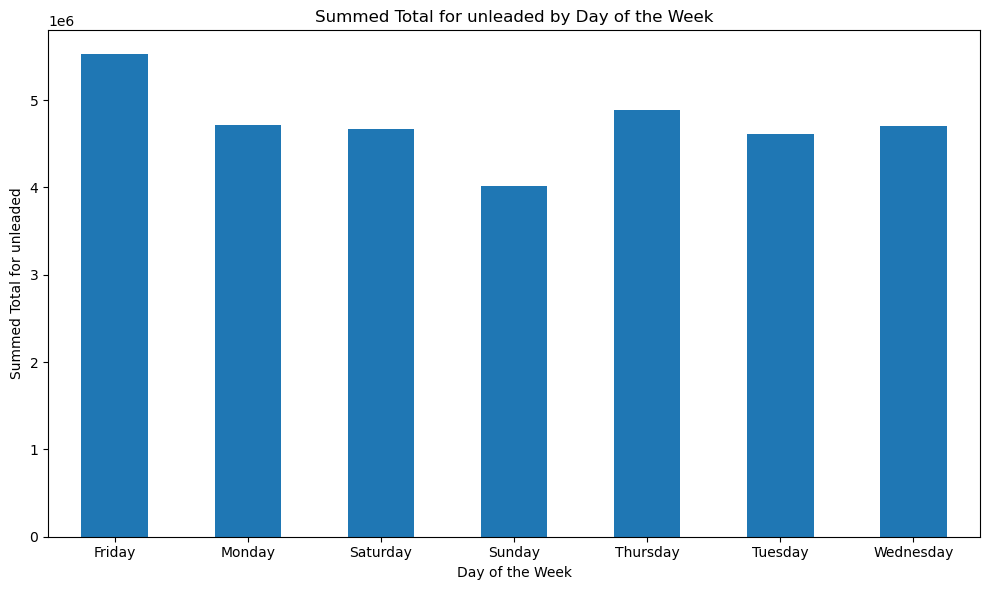

In [9]:
# Picking the columns to graph
columns = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service','diesel', 'unleaded']

# Grouping the numerical columns
grouped = df_tsdm.groupby('calendar.day_of_week')[columns].sum()

# Plotting the graphs
for column in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    grouped[column].plot(kind='bar', ax=ax)
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel(f'Summed Total for {column}')
    ax.set_title(f'Summed Total for {column} by Day of the Week')
    plt.xticks(rotation=0) 
    plt.tight_layout()
    plt.show()

For total inside sales, it looks like Friday has the most.
For food service, it looks like Friday has the most.
For diesel gallons sold, it looks like Wednesday has the most.
For unleaded gallons sold, it looks like Friday has the most. 

## 4.2 Observing each Numerical Column per Site and Weekday

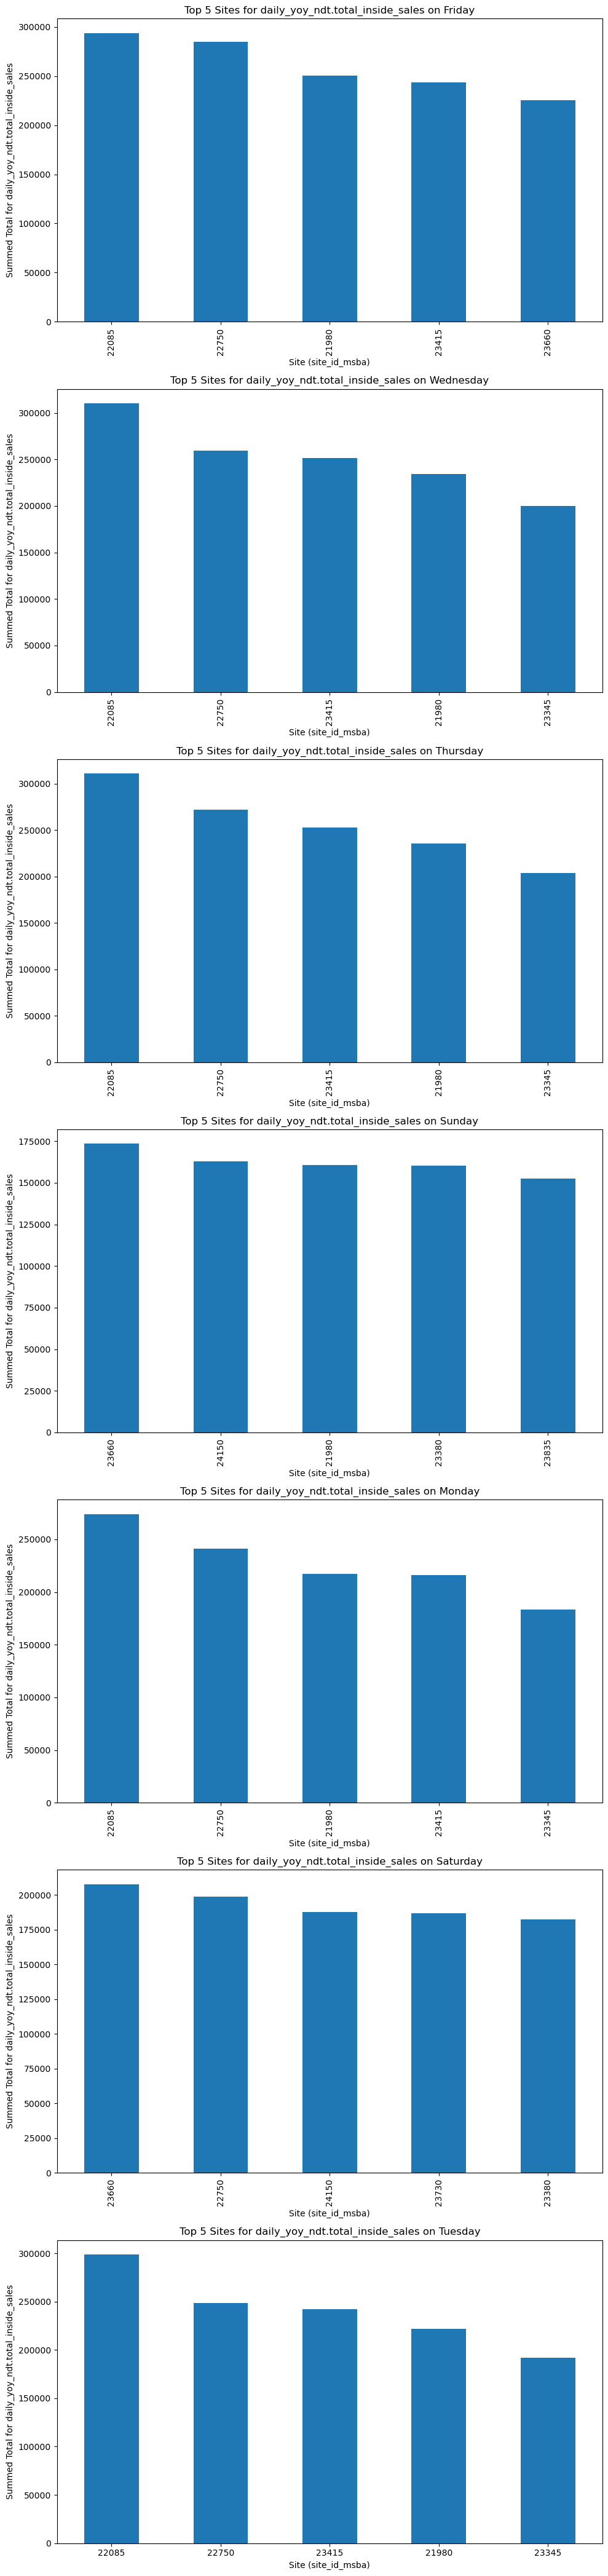

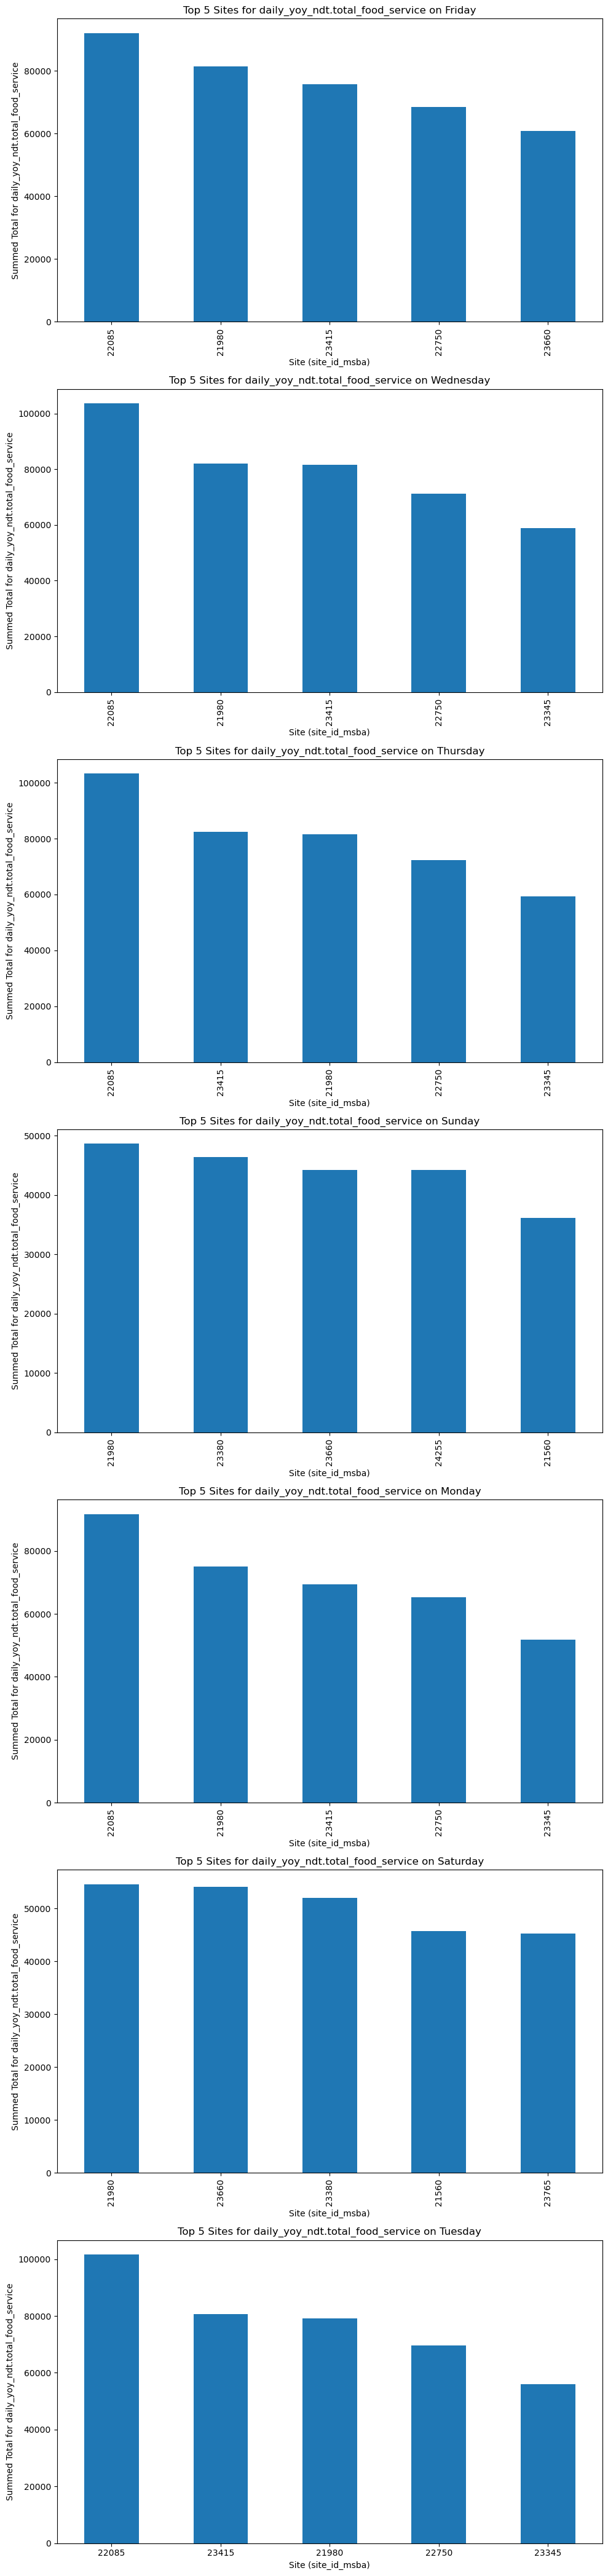

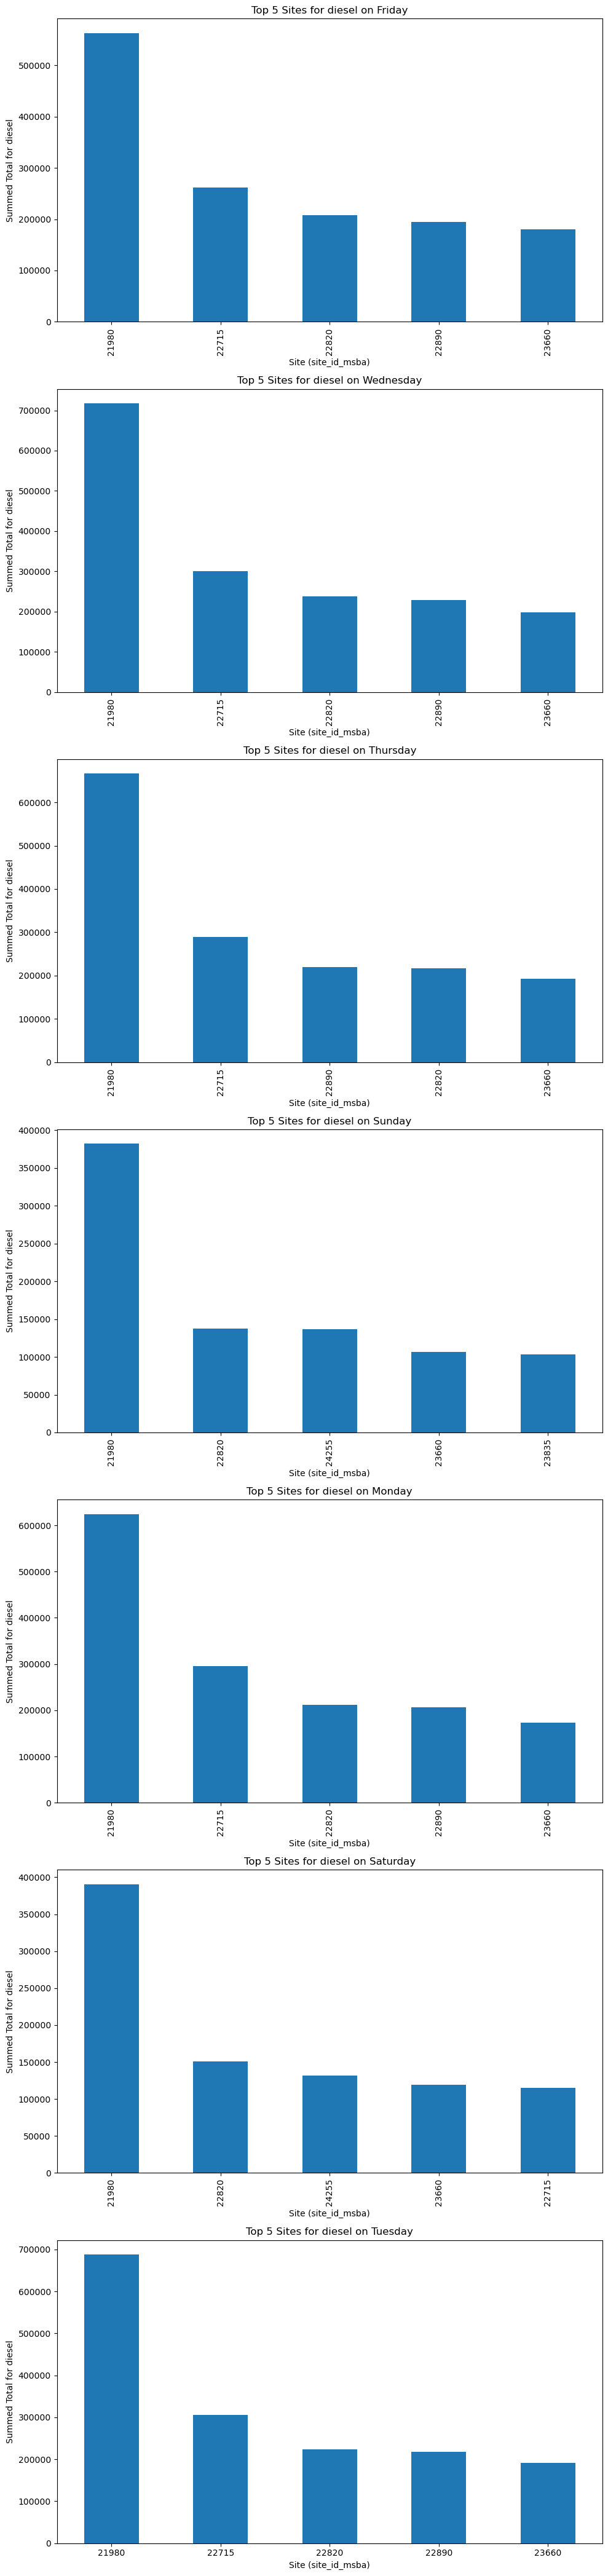

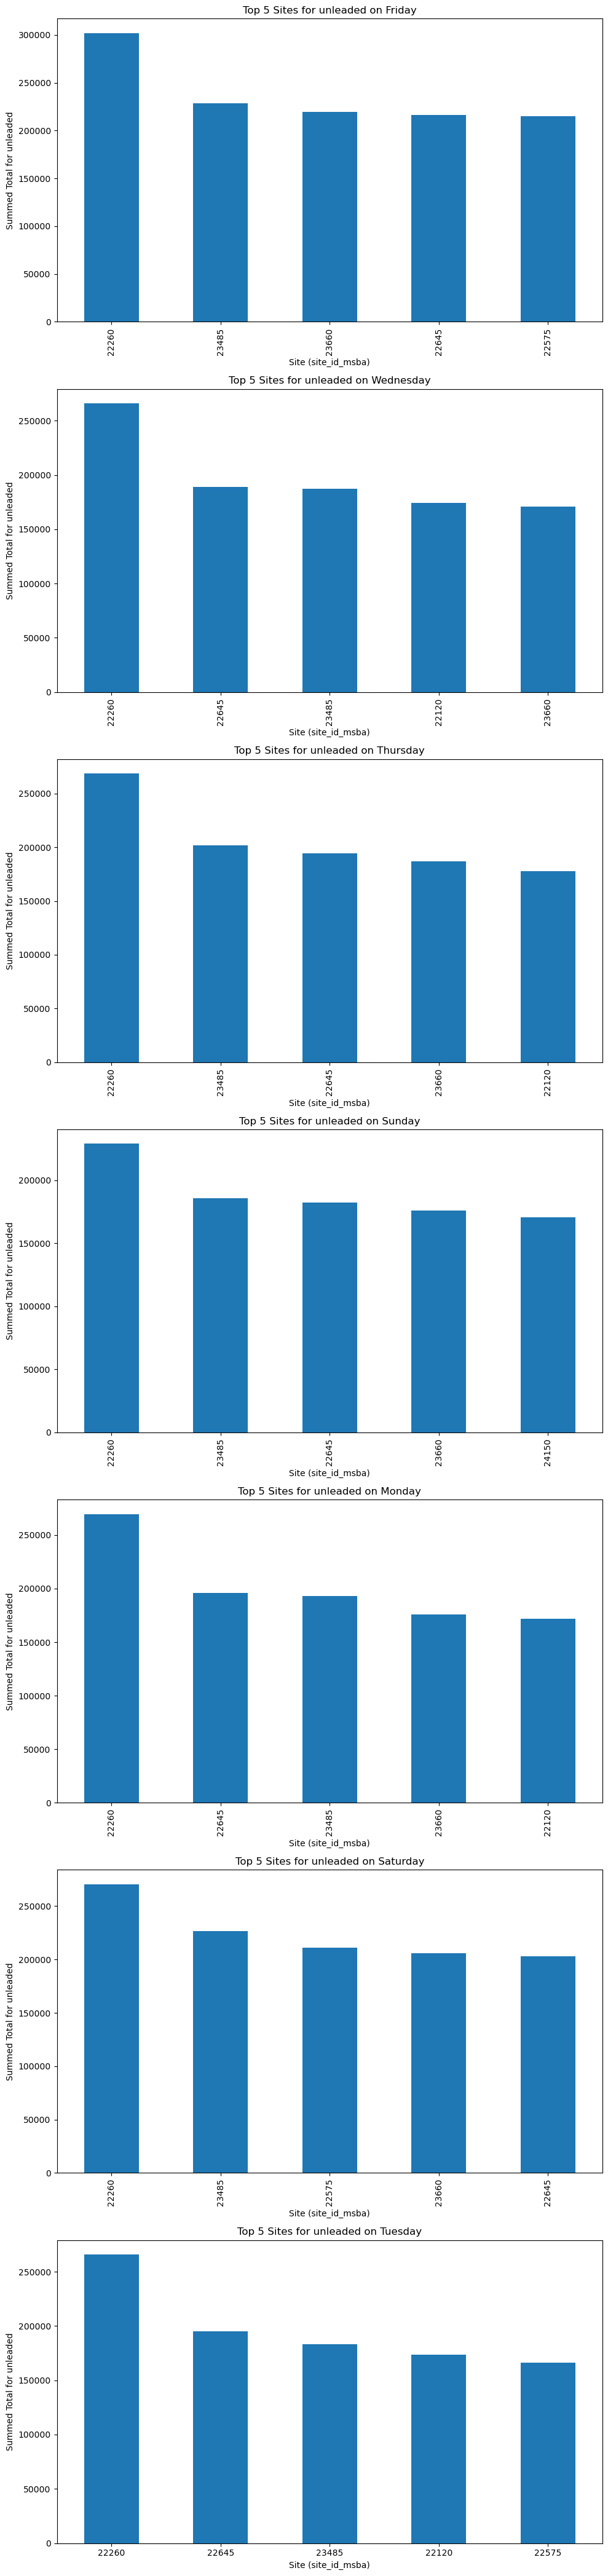

In [10]:
df_tsdm['site_id_msba'] = df_tsdm['site_id_msba'].astype(str)

for column in columns:
    fig, axes = plt.subplots(nrows=len(df_tsdm['calendar.day_of_week'].unique()), ncols=1, figsize=(10, 6 * len(df_tsdm['calendar.day_of_week'].unique())))
    
    for i, day in enumerate(df_tsdm['calendar.day_of_week'].unique()):
        # Filtering the data for the current day of the week and the specified numerical column
        filtered_data = df_tsdm[(df_tsdm['calendar.day_of_week'] == day)][[column, 'site_id_msba']]
        
        # Groupping the data by the site ID and summing the numerical variable
        grouped = filtered_data.groupby('site_id_msba')[column].sum().reset_index()
        
        # Sortting by the summed total in descending order and selecting the top 5
        top_5_sites = grouped.sort_values(by=column, ascending=False).head(5)
        
        # Creating a bar plot for the top 5 sites
        ax = axes[i]
        top_5_sites.plot(kind='bar', x='site_id_msba', y=column, ax=ax, legend=False)
        ax.set_xlabel('Site (site_id_msba)')
        ax.set_ylabel(f'Summed Total for {column}')
        ax.set_title(f'Top 5 Sites for {column} on {day}')
        plt.xticks(rotation=0) 
    
    plt.tight_layout()
    plt.show()

## 4.3 Observing each Numerical Column per Site

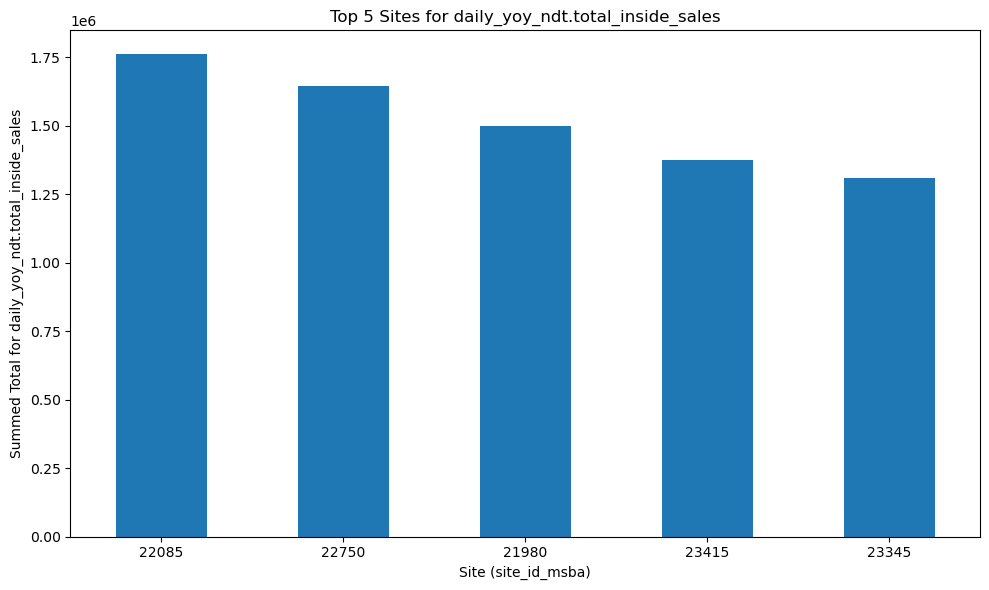

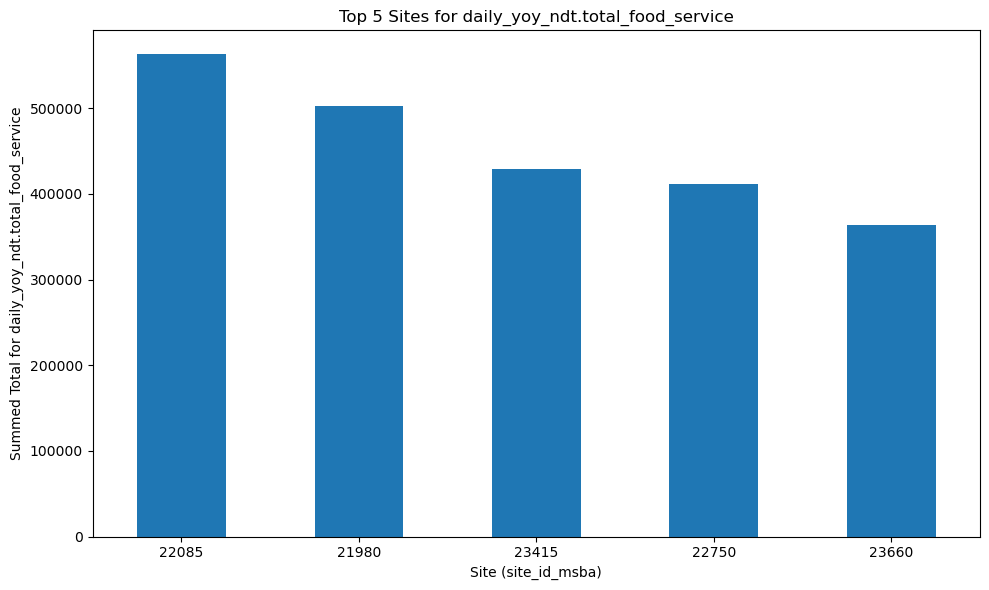

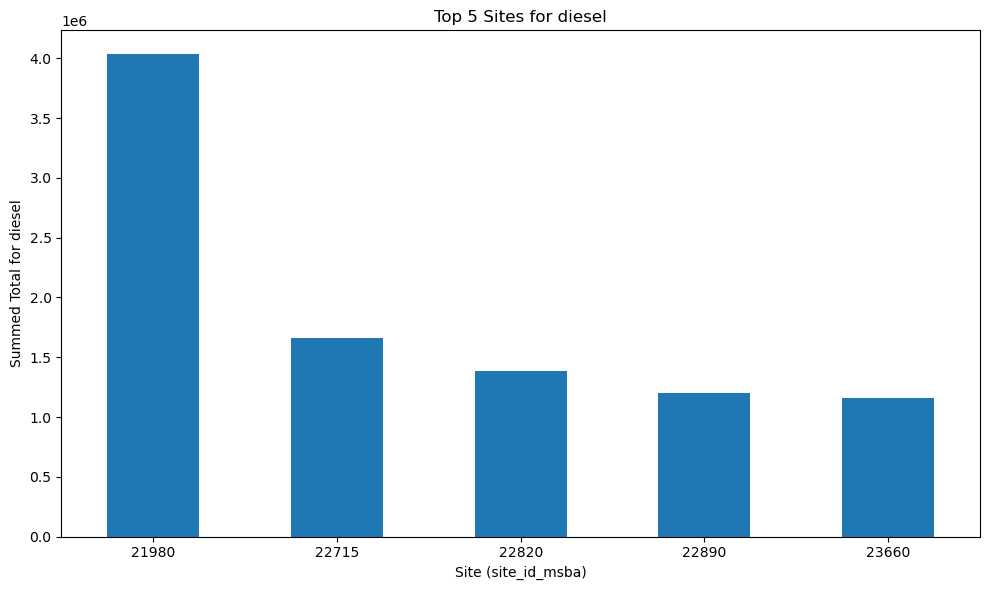

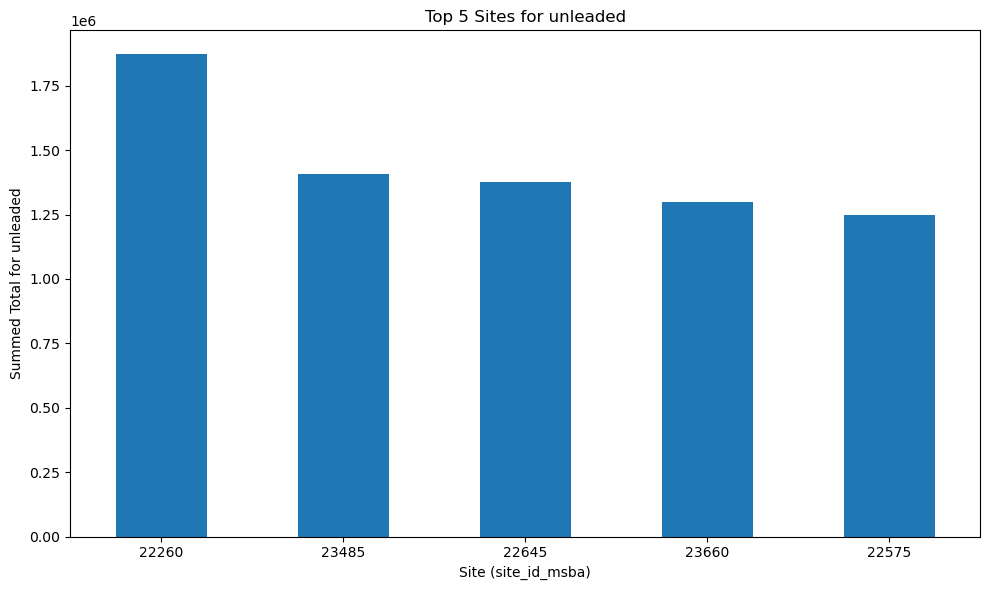

In [11]:
for column in columns:
    # Filtering the data for the specified numerical column
    filtered_data = df_tsdm[[column, 'site_id_msba']]
    
    # Groupping the data by the site ID and summing the numerical variable
    grouped = filtered_data.groupby('site_id_msba')[column].sum().reset_index()
    
    # Sorting by the summed total in descending order and selecting the top 5
    top_5_sites = grouped.sort_values(by=column, ascending=False).head(5)
    
    # Creating a bar plot for the top 5 sites
    fig, ax = plt.subplots(figsize=(10, 6))
    top_5_sites.plot(kind='bar', x='site_id_msba', y=column, ax=ax, legend=False)
    ax.set_xlabel('Site (site_id_msba)')
    ax.set_ylabel(f'Summed Total for {column}')
    ax.set_title(f'Top 5 Sites for {column}')
    plt.xticks(rotation=0)  
    plt.tight_layout()
    plt.show()

For total inside sales, it looks like site 22085 has the most.
For food service, it looks like site 22085 has the most.
For diesel gallons sold, it looks like site 21980 has the most.
For unleaded gallons sold, it looks like site 22260 has the most. 

## 4.4 Seeing Which Site and Weekday has the Highest Total Sales

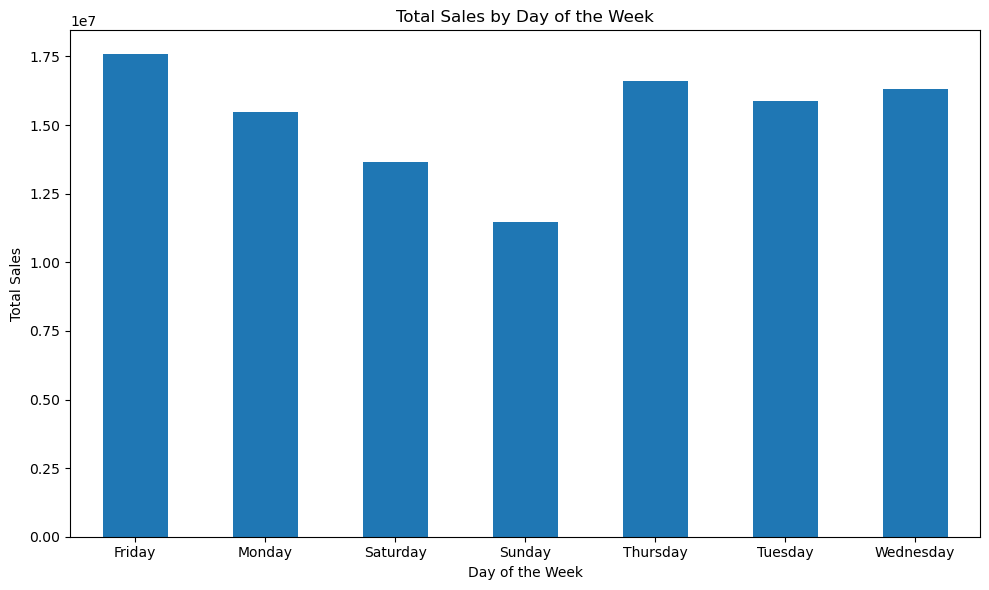

In [14]:
# Adding a new column called total_sales
df_tsdm['total_sales'] = df_tsdm[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']].sum(axis=1)

# Creating a bar chart showing total sales by day of the week
fig, ax1 = plt.subplots(figsize=(10, 6))
df_tsdm.groupby(df_tsdm['calendar.day_of_week'])['total_sales'].sum().plot(kind='bar', ax=ax1)
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales by Day of the Week')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


It looks like Fridays generate the most sales.

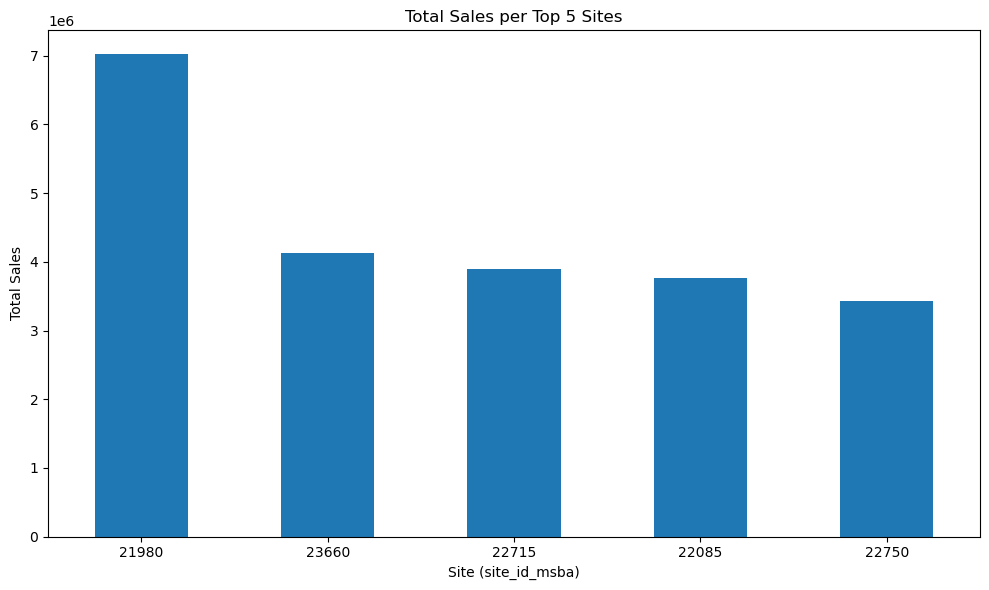

In [15]:
# Create a bar chart showing total sales per the top 5 sites
fig, ax2 = plt.subplots(figsize=(10, 6))
top_5_sites = df_tsdm.groupby('site_id_msba')['total_sales'].sum().nlargest(5)
top_5_sites.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Site (site_id_msba)')
ax2.set_ylabel('Total Sales')
ax2.set_title('Total Sales per Top 5 Sites')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

It looks like site 21980 is generating the most sales by a lot.

## 4.5 Creating a Line Graph of Total Sales to Observe Seasonality

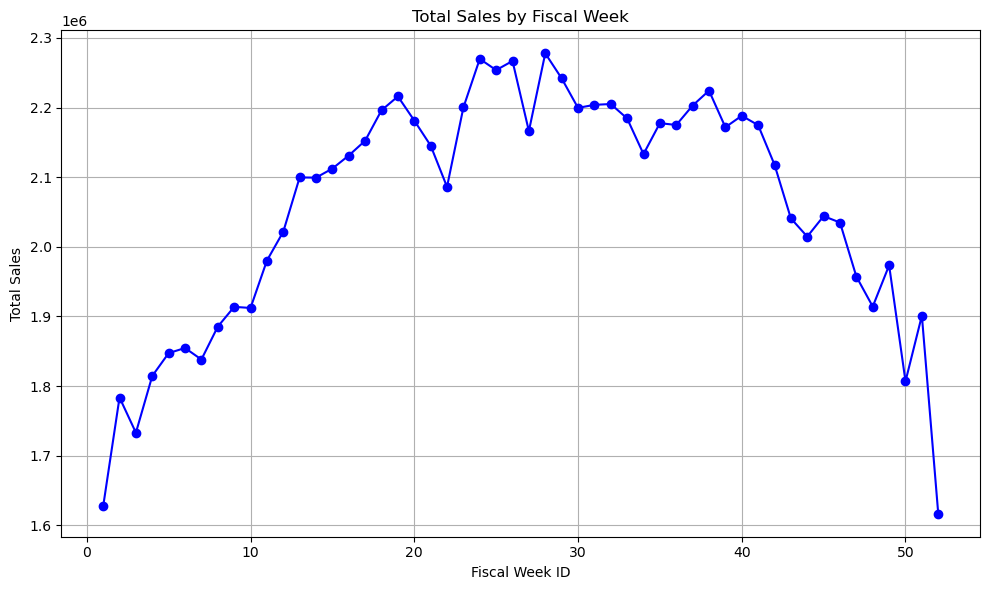

In [18]:
# Groupping by calendar.fiscal_week_id_for_year and calculating the sum of total_sales for each week
weekly_sales = df_tsdm.groupby('calendar.fiscal_week_id_for_year')['total_sales'].sum()

# Creating a line graph with calendar.fiscal_week_id_for_year on the x-axis and total_sales on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Fiscal Week ID')
plt.ylabel('Total Sales')
plt.title('Total Sales by Fiscal Week')
plt.xticks(rotation=0)
plt.grid(True)

plt.tight_layout()
plt.show()

This graph that total sales are lowest in the beginning and end of the year. It starts low and then increases, peaks in the middle of the year, and then starts decrease.

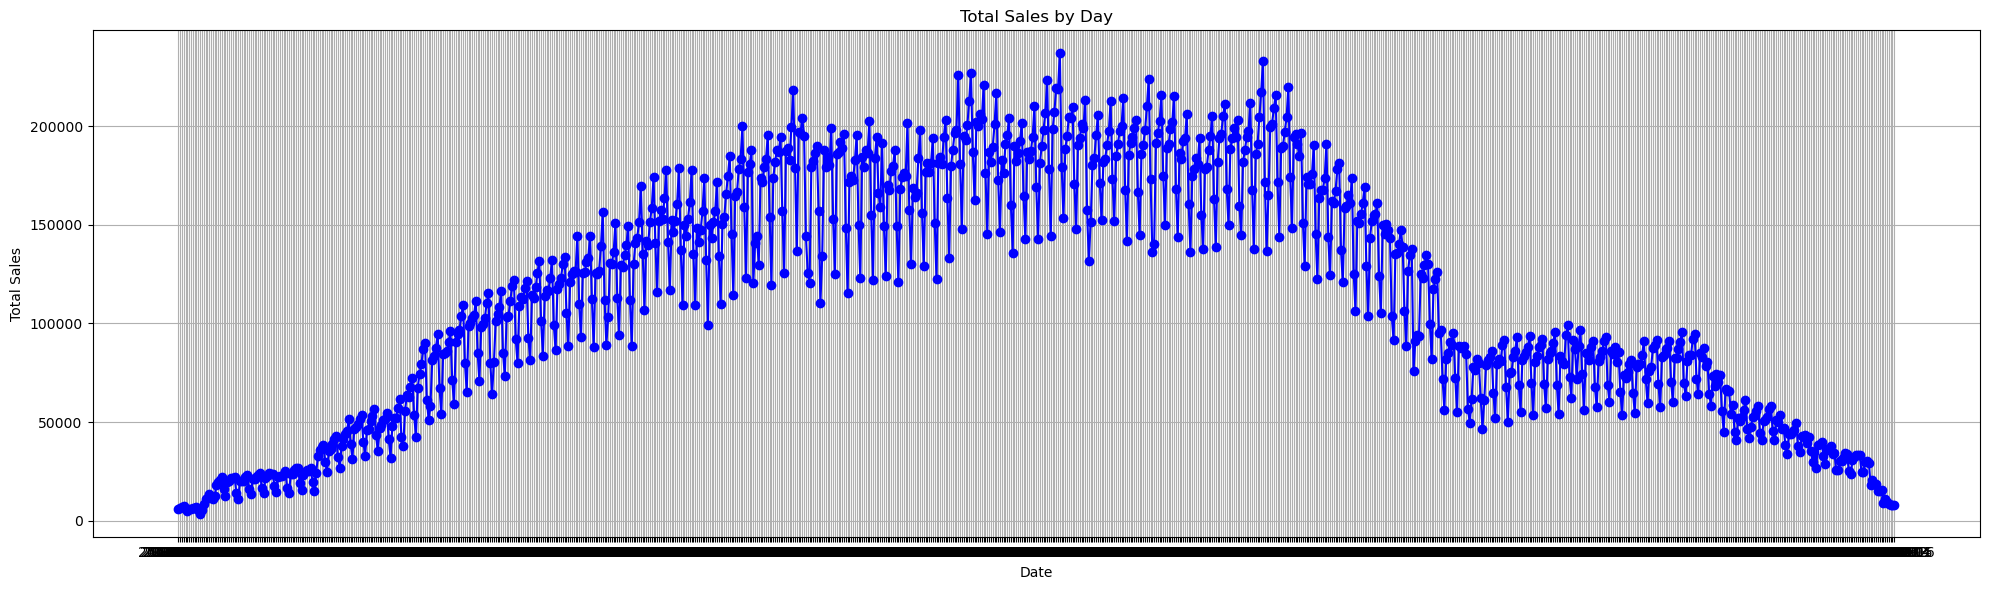

In [22]:
# Groupping by calendar.calendar_day_date and calculating the sum of total_sales for each week
daily_sales = df_tsdm.groupby('calendar.calendar_day_date')['total_sales'].sum()

# Creating a line graph with calendar.calendar_day_date on the x-axis and total_sales on the y-axis
plt.figure(figsize=(20, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day')
plt.xticks(rotation=0)
plt.grid(True)

plt.tight_layout()
plt.show()

This second graph by date also confirms what the first graph was showing.